In [3]:
import pandas as pd

ft=pd.read_csv('data/stockerbot-export.csv', on_bad_lines='skip')


In [12]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('subjectivity')
nltk.download('movie_reviews')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Matthew.Deighton\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package subjectivity to
[nltk_data]     C:\Users\Matthew.Deighton\AppData\Roaming\nltk_data...
[nltk_data]   Package subjectivity is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Matthew.Deighton\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [4]:
ft.head()

,id,text,timestamp,source,symbols,company_names,url,verified
0,1019696670777503700,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True
1,1019709091038548000,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,True
2,1019711413798035500,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True
3,1019716662587740200,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,True
4,1019718460287389700,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True


In [6]:
ft['symbols'].unique()

array(['GS', 'M', 'AIG', 'BTC', 'ORCL', 'FB-GOOGL-GOOG', 'HRS',
       'INTC-USB', 'NFLX', 'TWX', 'ENDP', 'HPQ', 'MGM', 'AMZN-GPS', 'UDR',
       'ticker', 'NTRS', 'CBS', 'BLK', 'GOOGL', 'EBAY', 'JD', 'TWTR',
       'FB', 'FIS', 'AJG', 'INFO', 'FLR', 'AVY', 'ETR', 'XYL', 'IRM',
       'ORLY', 'AVB', 'HP', 'MOS', 'HSY', 'NI', 'AMG', 'HCA', 'JEC',
       'ODP', 'COO', 'SNPS', 'ARRY', 'REG', 'RHI', 'DLTR', 'FNSR', 'NVAX',
       'ANSS', 'PNR', 'DDR', 'EL', 'EXPD', 'AEE', 'AON', 'LH', 'ALLE',
       'AIV', 'RE', 'WU', 'WRK', 'AAP', 'OKE', 'XRAY', 'MTD', 'TMK',
       'SLM', 'SRCL', 'IP', 'EMN', 'NUAN', 'AKAM', 'TRQ', 'GNTX', 'DCIX',
       'FBHS', 'ZBH', 'BXP', 'MAA', 'KIM', 'HIBB', 'CNP', 'PAH', 'WYN',
       'TROW', 'ECL', 'LUK', 'WM', 'AZO', 'HIG', 'AES', 'FMSA', 'QRVO',
       'CX', 'HDS', 'WLTW', 'MUR', 'ROP', 'DLPH', 'GNCA', 'ED', 'HSIC',
       'ROST', 'VAR', 'UHS', 'FRT', 'ZTS', 'HOLX', 'DTE', 'ETE', 'AEP',
       'TMO', 'PTEN', 'FLEX', 'XL', 'PDCO', 'HCP', 'MON', 'COL', 'CINF',
  

In [7]:
ft['symbols'].value_counts()

NFLX             101
AMAT             100
GPS              100
MOMO             100
HON              100
                ... 
INTC-USB           1
AMZN-GPS           1
FB-GOOGL-GOOG      1
M                  1
GS                 1
Name: symbols, Length: 453, dtype: int64

In [10]:
nt=ft[ft['symbols']=='NFLX']
nt_sorted=nt.sort_values(by='timestamp')

In [18]:
compound_scores = []

for index, row in nt_sorted.iterrows():
    tweet=row['text']
    analysis=sia.polarity_scores(tweet)
    compound_scores.append(analysis['compound'])
    
nt_sorted['Sentiment_score'] = compound_scores
nt_sorted

,id,text,timestamp,source,symbols,company_names,url,verified,Sentiment_score
26216,1019690098236055600,Netflix $NFLX just released quarterly 10-Q. Q...,Wed Jul 18 21:07:19 +0000 2018,Feedmeistercom,NFLX,Netflix,NaN,False,0.4545
26223,1019690300187533300,RT @blackbullforex: Excluding FAANG Stocks The...,Wed Jul 18 21:08:07 +0000 2018,dexoidan,NFLX,Netflix,NaN,False,-0.2960
26236,1019690538398707700,RT @RampCapitalLLC: Here is where $FANG was tr...,Wed Jul 18 21:09:03 +0000 2018,hs_traders,NFLX,Netflix,NaN,False,0.5719
26239,1019690604559851500,RT @SevenPointsCap: Trader Takeaways 7.18.18 b...,Wed Jul 18 21:09:19 +0000 2018,clovisskyline,NFLX,Netflix,http://youtu.be/MLmX7WMEBVM?a,False,0.0000
26241,1019690654383759400,#NASDAQ MOST VOLUME $HMNY -9.09% [Volume: +82...,Wed Jul 18 21:09:31 +0000 2018,Market_Scanner,NFLX,Netflix,https://twitter.com/i/web/status/1019690654383...,False,0.0000
...,...,...,...,...,...,...,...,...,...
28026,1019726442689638400,RT @TopTickrs: $NFLX Long Trending Chart 2018-...,Wed Jul 18 23:31:44 +0000 2018,juliusagusta,NFLX,Netflix,NaN,False,0.0000
28066,1019727237296414700,RT @owlmaster08: Luckily $TSLA has great user ...,Wed Jul 18 23:34:53 +0000 2018,28delayslater,NFLX,Netflix,NaN,False,0.8750
28099,1019728080951275500,RT @the_chart_life: Kanye/Kim Christmas portfo...,Wed Jul 18 23:38:14 +0000 2018,AshtonBroussard,NFLX,Netflix,NaN,False,0.0000
28115,1019728237381890000,Dow up 79 $AMZN $GOOGL $NFLX $BA $TSLA $TWTR $...,Wed Jul 18 23:38:52 +0000 2018,NaviAvatar1,NFLX,Netflix,https://www.pscp.tv/w/bh_HDDQ1NDk4MjV8MU9kS3Jw...,False,0.0000


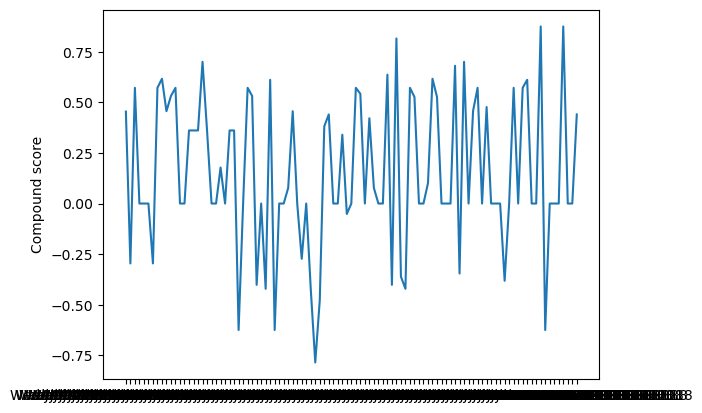

In [16]:
import matplotlib.pyplot as plt

plt.plot(nt_sorted['timestamp'],compound_scores)
plt.ylabel('Compound score')
plt.show()